In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import  mean_squared_error, mean_absolute_error


In [15]:
# Loading the data
data = pd.read_csv("labeled_data.csv")

# Previewing the data
print(data.head())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   
5           5      3            1                   2        0      1   
6           6      3            0                   3        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...  
6  !!!!!!"@__BrighterDays: I c

In [25]:
# Converting multiclass to binary class
data["labels_binary"] = np.where(data["class"] != 2, 1, 0)
  print(data)
# Splitting data into features and labels
X = data["tweet"]
y = data["labels_binary"]

IndentationError: unexpected indent (3278245096.py, line 3)

In [17]:

# Vectorizing text data
cv = CountVectorizer()
X = cv.fit_transform(X)

In [18]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# Building and training the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# Predicting probabilities and labels
y_probs = model.predict_proba(X_test)
y_pred = model.predict(X_test)

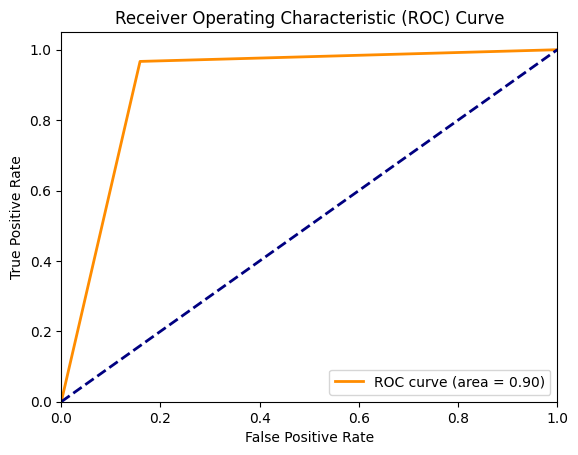

In [21]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

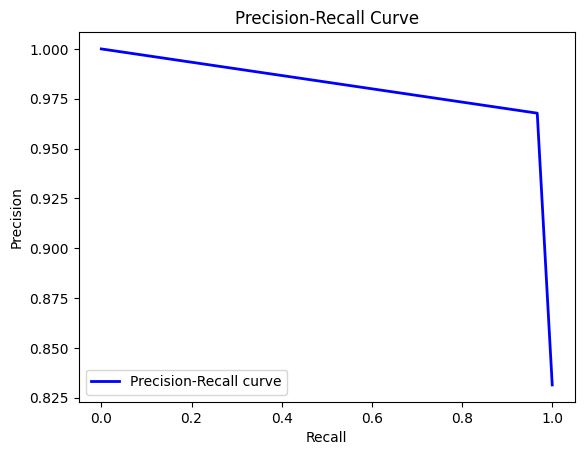

In [22]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs[:, 1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

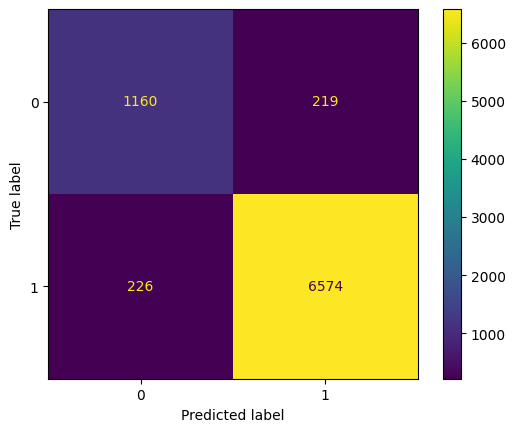

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

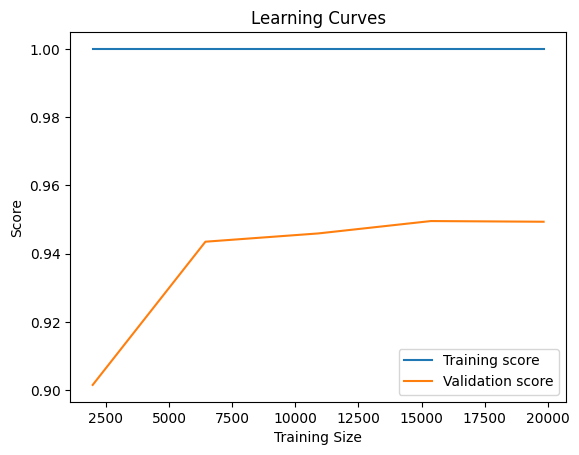

In [24]:
# Learning Curves
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [ ]:
# Get feature importances and names
importances = model.feature_importances_
feature_names = cv.get_feature_names_out()

# Create a mapping table of words to numeric values
mapping_df = pd.DataFrame({"Word": feature_names, "Numeric Value": range(len(feature_names))})

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances with numeric values on x-axis
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances[:20])), importances[indices][:20], align='center')
plt.xticks(range(len(importances[:20])), range(len(importances[:20])), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances')

# Create a new mapping DataFrame for the top 20 features
top_20_indices = indices[:20]
top_20_words = feature_names[top_20_indices]
top_20_mapping_df = pd.DataFrame({"Word": top_20_words, "Numeric Value": range(len(top_20_words))})

# Display the plot
plt.tight_layout()
plt.show()

# Display the mapping table
print(top_20_mapping_df)

In [ ]:
# Identify misclassified instances
misclassified_indices = np.where(y_test != y_pred)[0]

# Extract the misclassified tweets and their true and predicted labels
misclassified_tweets = X_test[misclassified_indices]
misclassified_true_labels = y_test.iloc[misclassified_indices]
misclassified_pred_labels = y_pred[misclassified_indices]

# Convert the misclassified tweets back to text
misclassified_tweets_text = cv.inverse_transform(misclassified_tweets)

# Print a few examples of misclassified tweets
for i in range(min(10, len(misclassified_indices))):
    print(f"Tweet: {' '.join(misclassified_tweets_text[i])}")
    print(f"True Label: {misclassified_true_labels.iloc[i]}, Predicted Label: {misclassified_pred_labels[i]}")
    print("-" * 50)


In [ ]:
# TSNE or PCA Visualization
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())

# Filter the data to only include points with label 0
mask = (y == 0)
components_filtered = components[mask]
y_filtered = y[mask]

# Plot the PCA components with only blue points
sns.scatterplot(x=components_filtered[:, 0], y=components_filtered[:, 1], hue=y_filtered, palette={0: "blue"}, legend=False)
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f1*100)

# Plot F1 score
plt.figure()
plt.bar(["F1 Score"], [f1], color='skyblue')
plt.ylabel('Score')
plt.title('F1 Score')
plt.show()

In [ ]:
# Compute the residuals (errors)
errors = y_test - y_pred

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Compute the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the errors and MSE, MAE, RMSE
print("Residuals (Errors):")
print(errors)
print("\nMean Squared Error (MSE):")
print(mse)
print("\nMean Absolute Error (MAE):")
print(mae)
print("\nRoot Mean Squared Error (RMSE):")
print(rmse)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()